# Visualizing output of `sourmash compare`

This notebook reads in the CSV file produced by `sourmash compare` and produces two visualizations, an MDS (ordination) plot and a clustered heat map.
`Sourmash compare` outputs an all-by-all similarity matrix for a group of samples.
When the samples were sketched with abundance tracking as was done here (e.g. the abundance of each k-mer was recorded), the similarity matrix encodes the cosine similarity.

In [1]:
# the default directory is the "notebooks" folder; set it one level up.
setwd("..")

In [29]:
# adjust plot size rendered inline
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

In [34]:
library(readr)
library(dplyr)
library(tibble)
library(ggplot2)
library(ggrepel)

In [44]:
compare <- read_csv("outputs/sourmash_compare/comp_k31.csv", show_col_types = F) %>%
  mutate(sample = colnames(.)) %>% # make column names into a column
  column_to_rownames("sample") %>% # set rownames to column names
  as.matrix()                      # convert to matrix for dist functions

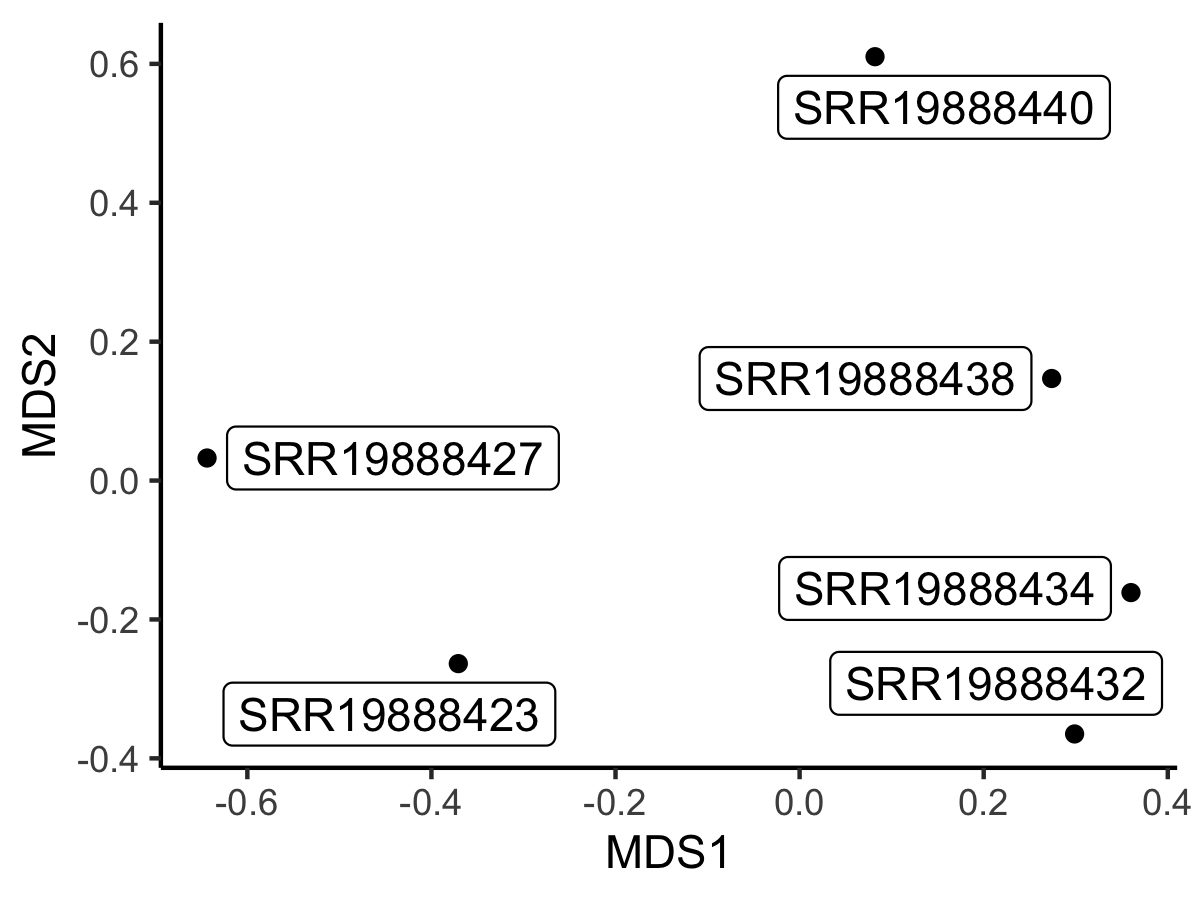

In [45]:
# mds plot
compare_mds <- compare %>% 
  dist() %>%
  cmdscale() %>%
  as.data.frame() %>%
  rename(MDS1 = V1, MDS2 = V2) %>%
  rownames_to_column("sample")

ggplot(compare_mds, aes(x = MDS1, y = MDS2, label = sample)) +
  geom_point() +
  geom_label_repel() +
  theme_classic()

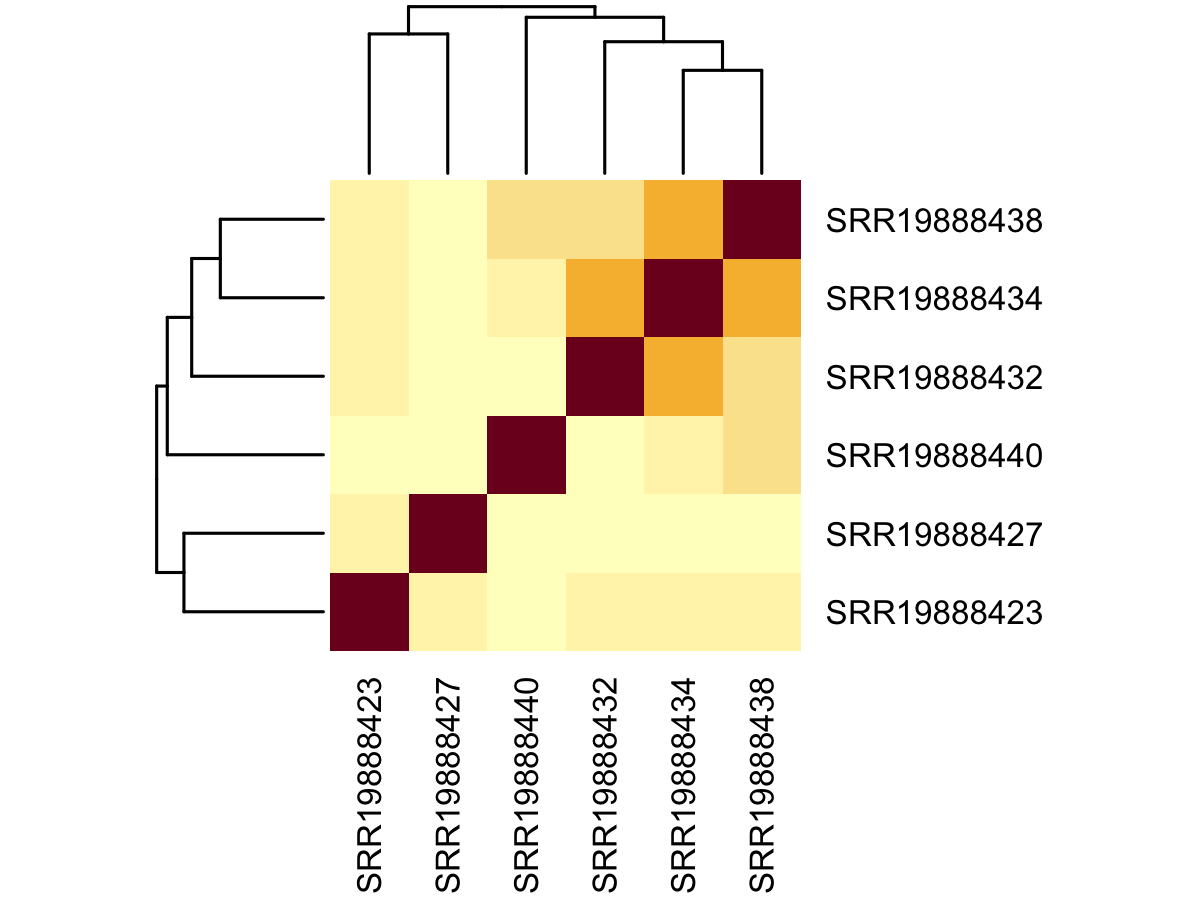

In [46]:
# clustered heatmap
hc_rows <- hclust(dist(compare))
hc_cols <- hclust(dist(t(compare)))
heatmap(compare, 
        Colv = as.dendrogram(hc_cols), 
        Rowv = as.dendrogram(hc_rows),
        scale='none', cexRow = 0.8, cexCol = .8)